<a href="https://colab.research.google.com/github/bunnyband/sales-predictions/blob/main/17_Activity_Recreate_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recreate Graph

## Task
The dataset given to you [here](https://drive.google.com/file/d/1r86JMCPftaxI-JUF4GFUqBlmcHHhc7X-/view) is the mortgage dataset used previously in this course. Your goal is to reproduce the graph. The black plot is the 30 year mortgage at 5% and the blue line is the 30 year mortgage at 3%. What is graphed is the cumulative interest paid over the course of the loan. Note that this isn't a beautiful graph. It doesn't say which line is for which mortgage and the graph itself isn't the most visually appealing graph. These are the sort of things that are covered throughout the course. 

Use Python to recreate this graph:

![](https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/Screen_Shot_2020-09-04_at_11.08.51_AM.png)

## Initialization and Dataset Loading

In [ ]:
# mount data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# load the dataset
df = pd.read_csv('/content/drive/MyDrive/mortgages.csv')
df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Questions and Soliutions

1. Create a filter so the Mortgage Name is '30 Year'.  Use the len() to find how many rows correspond to 30 years.

In [ ]:
mortgageFilter = df['Mortgage Name'] == '30 Year'
mortgageFilter

0        True
1        True
2        True
3        True
4        True
        ...  
1075    False
1076    False
1077    False
1078    False
1079    False
Name: Mortgage Name, Length: 1080, dtype: bool

In [ ]:
import numpy as np
np.count_nonzero(mortgageFilter)

720

2. Create a filter for an interest rate of 3% (notice how it is written in the data!).

In [ ]:
interestFilter = df['Interest Rate'] == 0.03

3. Define a new dataframe based on both the year and the interest filters you have created.

In [ ]:
mortgage30_03 = df.loc[mortgageFilter & interestFilter, : ]

4. We have a choice for the 5% interest rate:

We can just create another filter where df.['Interest Rate'] == .05 

OR 

We can use the negate symbol (~) with our current filter to give us everything EXCEPT what we have defined in the filter. This works here because we only have two interest rates (any value that is NOT 3% is 5%)

In [ ]:
mortgage30_05 = df.loc[mortgageFilter & ~interestFilter,: ]
mortgage30_05

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
360,1,400000.00,2147.29,1666.66,480.63,399519.37,30 Year,0.05
361,2,399519.37,2147.29,1664.66,482.63,399036.74,30 Year,0.05
362,3,399036.74,2147.29,1662.65,484.64,398552.10,30 Year,0.05
363,4,398552.10,2147.29,1660.63,486.66,398065.44,30 Year,0.05
364,5,398065.44,2147.29,1658.60,488.69,397576.75,30 Year,0.05
...,...,...,...,...,...,...,...,...
715,356,10596.54,2147.29,44.15,2103.14,8493.40,30 Year,0.05
716,357,8493.40,2147.29,35.38,2111.91,6381.49,30 Year,0.05
717,358,6381.49,2147.29,26.58,2120.71,4260.78,30 Year,0.05
718,359,4260.78,2147.29,17.75,2129.54,2131.24,30 Year,0.05


5. Since we want to graph the cumulative sum of the interest paid, you can use the function .cumsum().  What are the first three values in the output for the cumulative sum of the 3% rate?

In [ ]:
z = mortgage30_03['Interest Paid'].cumsum()

z

0        1000.00
1        1998.28
2        2994.84
3        3989.67
4        4982.77
         ...    
355    207064.13
356    207080.87
357    207093.44
358    207101.82
359    207106.01
Name: Interest Paid, Length: 360, dtype: float64

6. Use plt.plot(x, y, c=color) to plot the black line (5%).  We want the x values to be the ['Month'] and the y values to be the cumulative sum of the Interest Paid.  You can use the code from the previous question to define your y values within the plt.plot() function!  Hint: for black, c = 'k'

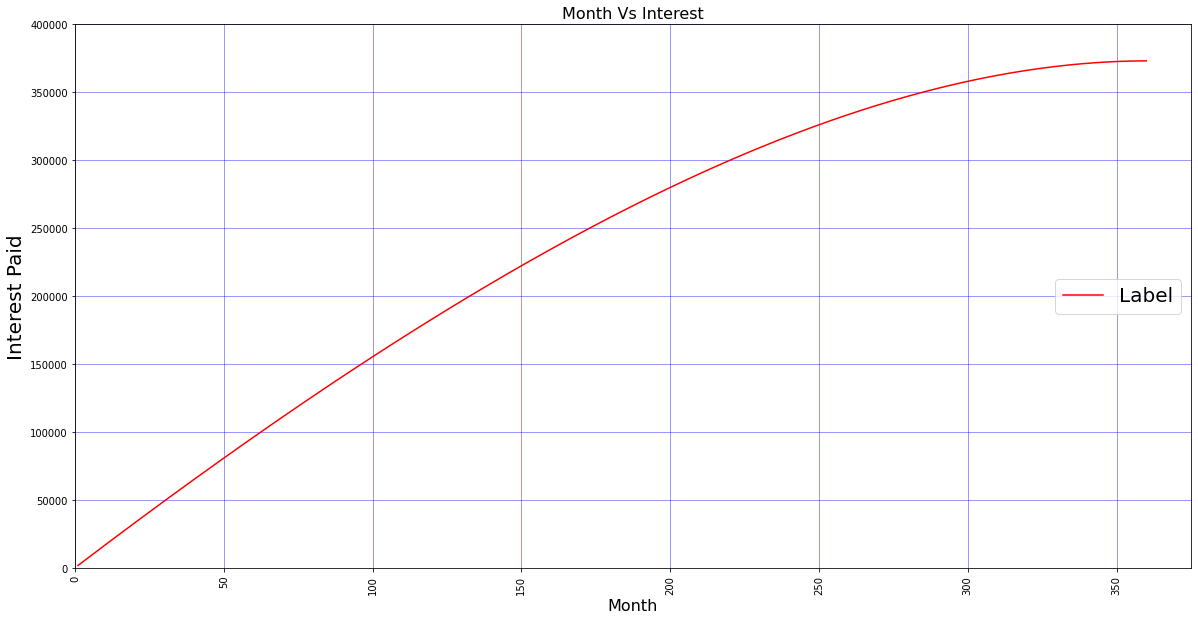

In [ ]:
plt.figure(figsize =(20, 10))

plt.xlabel('Month', fontsize = 16)
plt.ylabel('Interest Paid', fontsize = 20)
plt.xlim(left=0,right=375)
plt.ylim(bottom=0,top=400000)
plt.xticks(rotation = 90)

plt.title('Month Vs Interest', fontsize = 16)


plt.grid(c = 'blue', alpha = 0.5)


plt.plot(mortgage30_05['Month'], mortgage30_05['Interest Paid'].cumsum(), c = 'red', label = 'Label')

plt.legend(loc="center right", fontsize = 20)

7. To get both lines on the same graph, just put two plt.plot() functions one after the other in same code block and run it!

Submit your code and reproduced graph! Hint: for blue, c = 'b'

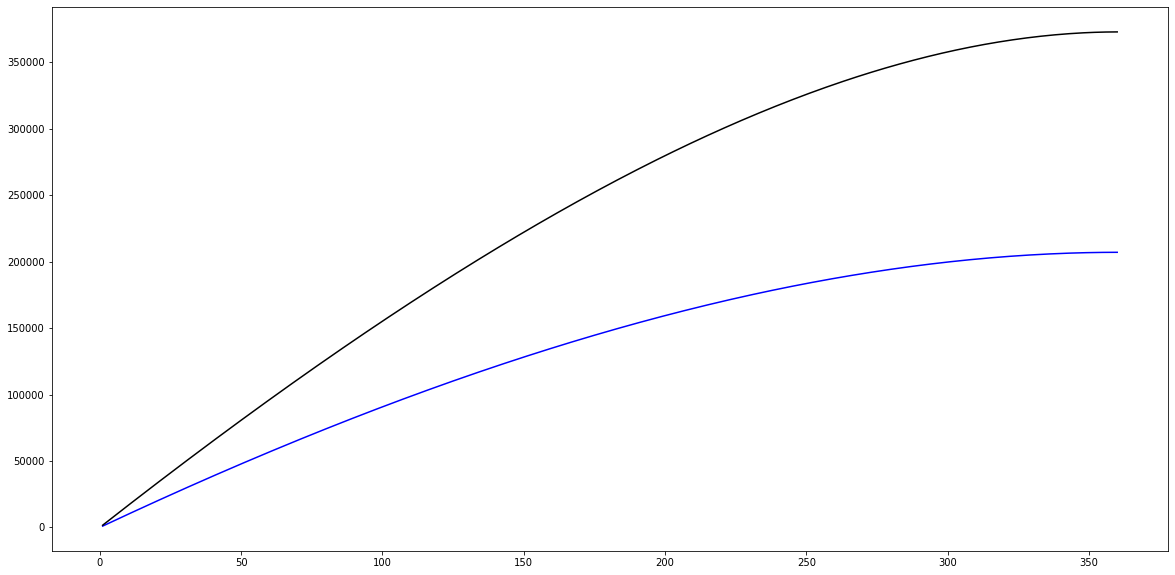

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(20, 10) )
axes.plot(mortgage30_03['Month'], mortgage30_03['Interest Paid'].cumsum(), c = 'b');
axes.plot(mortgage30_05['Month'], mortgage30_05['Interest Paid'].cumsum(), c = 'k');



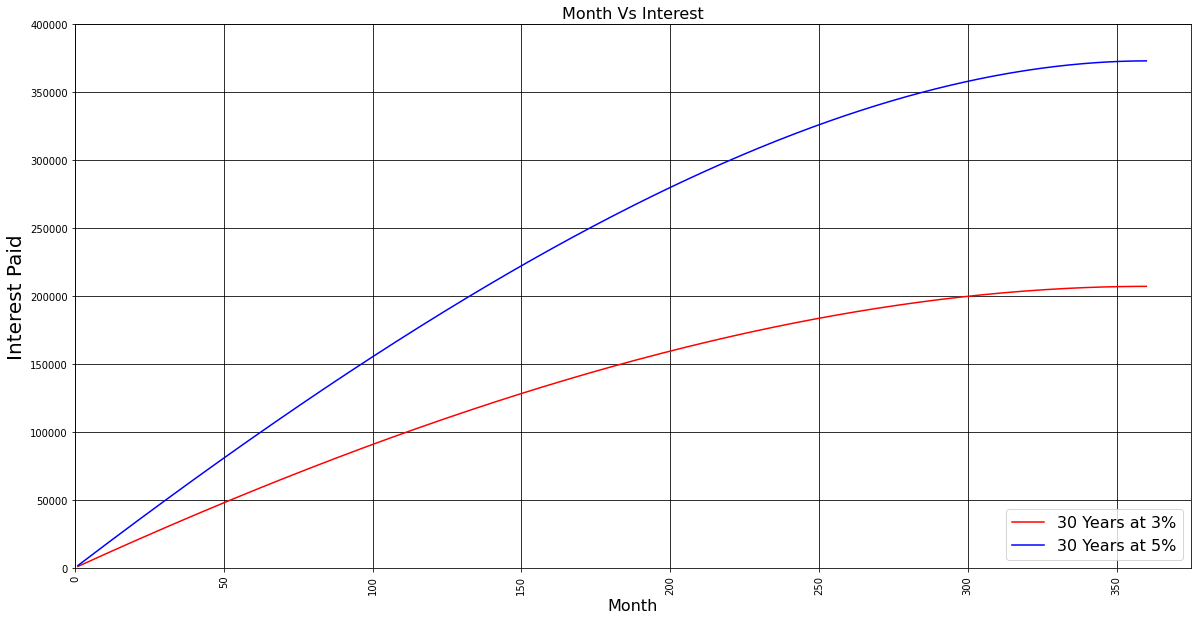

In [ ]:
plt.figure(figsize =(20, 10))

plt.xlabel('Month', fontsize = 16)
plt.ylabel('Interest Paid', fontsize = 20)
plt.xlim(left=0,right=375)
plt.ylim(bottom=0,top=400000)
plt.xticks(rotation = 90)

plt.title('Month Vs Interest', fontsize = 16)


plt.grid(c = 'black', alpha = 1)

plt.plot(mortgage30_03['Month'], mortgage30_03['Interest Paid'].cumsum(), c = 'red', label = '30 Years at 3%');
plt.plot(mortgage30_05['Month'], mortgage30_05['Interest Paid'].cumsum(), c = 'b', label = '30 Years at 5%');

plt.legend(loc="lower right", fontsize = 16)

plt.savefig('Graph.png', dpi = 1200)